In [4]:
#Applied Machine Learning Project
#Harish Sathiyanarayanan - NetID: HXS210073
#Predicting the price of AirBnB listings in USA

In [5]:
#libraries used for this project
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import datasets
# importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# importing for least angle regression
from sklearn.linear_model import Lars
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [6]:
air = pd.read_csv(r'C:\Users\haris\OneDrive\Desktop\AML Project\dataset\train.csv')


In [7]:
#head of the dataset
air.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [8]:
#tail of the dataset
air.tail()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0
74110,3534845,4.852030,Boat,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",4,1.0,Real Bed,moderate,False,...,33.761096,-118.192409,Cozy Boat at Shoreline Village,Long Beach,205,96.0,https://a0.muscache.com/im/pictures/22968537/d...,90802,1.0,2.0


In [9]:
#shape of the dataset
air.shape

(74111, 29)

In [10]:
#describe the dataset
air.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [11]:
#unique values in the dataset
air.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [12]:
#check for null values
air.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [13]:
#info of the dataset
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [14]:
#data types of the dataset
air.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [15]:
#columns of the dataset
air.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

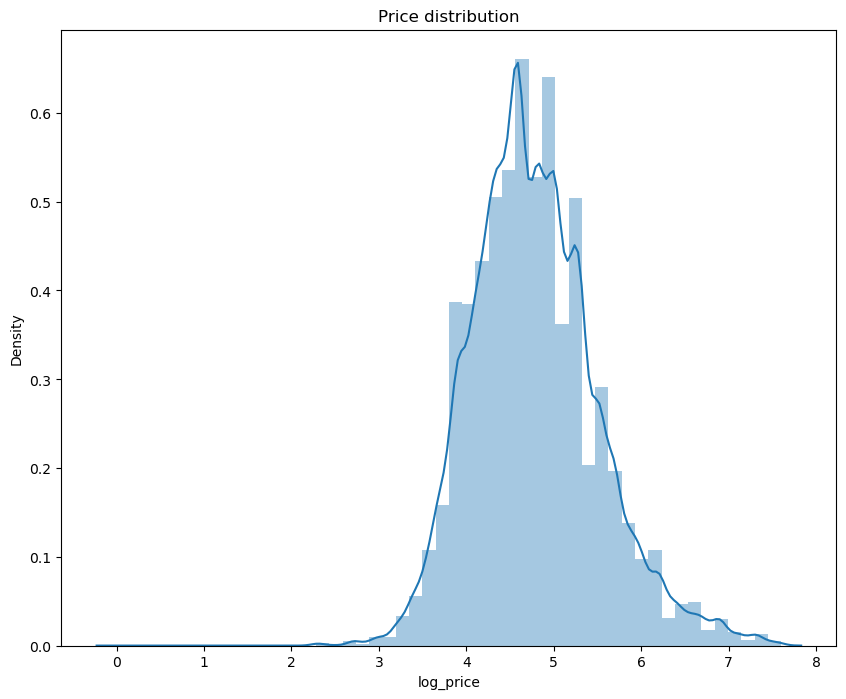

In [16]:
#Log price distribution
plt.figure(figsize = (10, 8))
sns.distplot(air["log_price"])
plt.title('Price distribution')
plt.show()

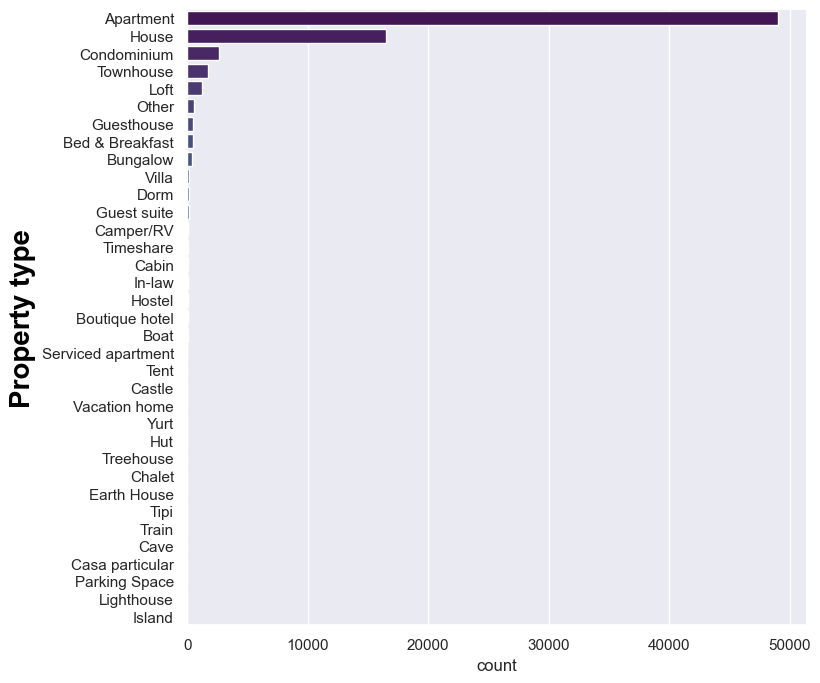

In [17]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'property_type',data = air,order = air['property_type'].value_counts().index,palette = "viridis")
plt.ylabel('Property type',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

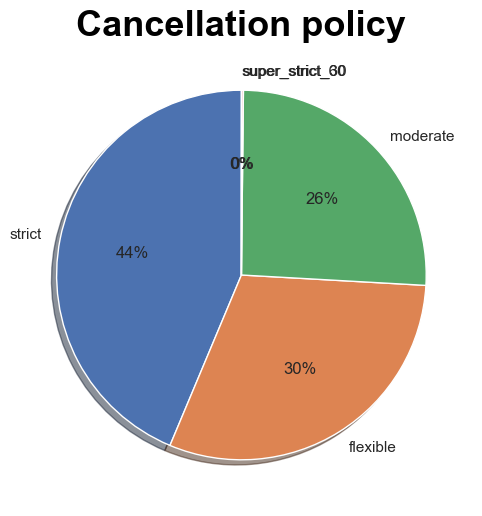

In [18]:
air_can=air['cancellation_policy'].value_counts()
labels=air_can.index
fig,ax1=plt.subplots(1,1,figsize=(6,6))
ax1.pie(air_can,labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
plt.title("Cancellation policy",fontsize=26, weight = 'bold',color="black")
plt.show()

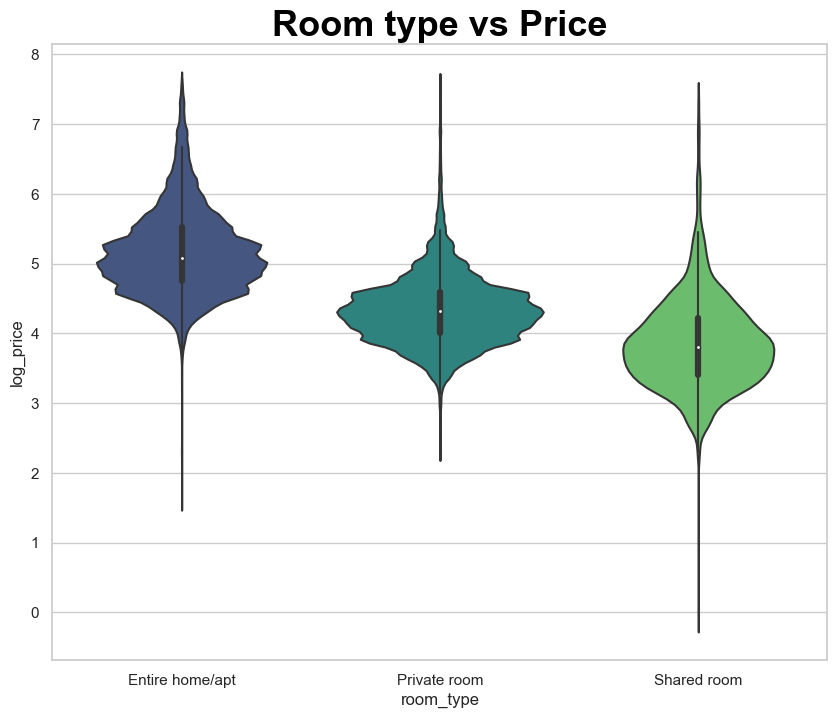

In [19]:
#violon plot
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.violinplot(x="room_type", y="log_price", data=air,palette = "viridis")
plt.title("Room type vs Price",fontsize=26, weight = 'bold',color="black")
plt.show()

<Axes: xlabel='bed_type', ylabel='log_price'>

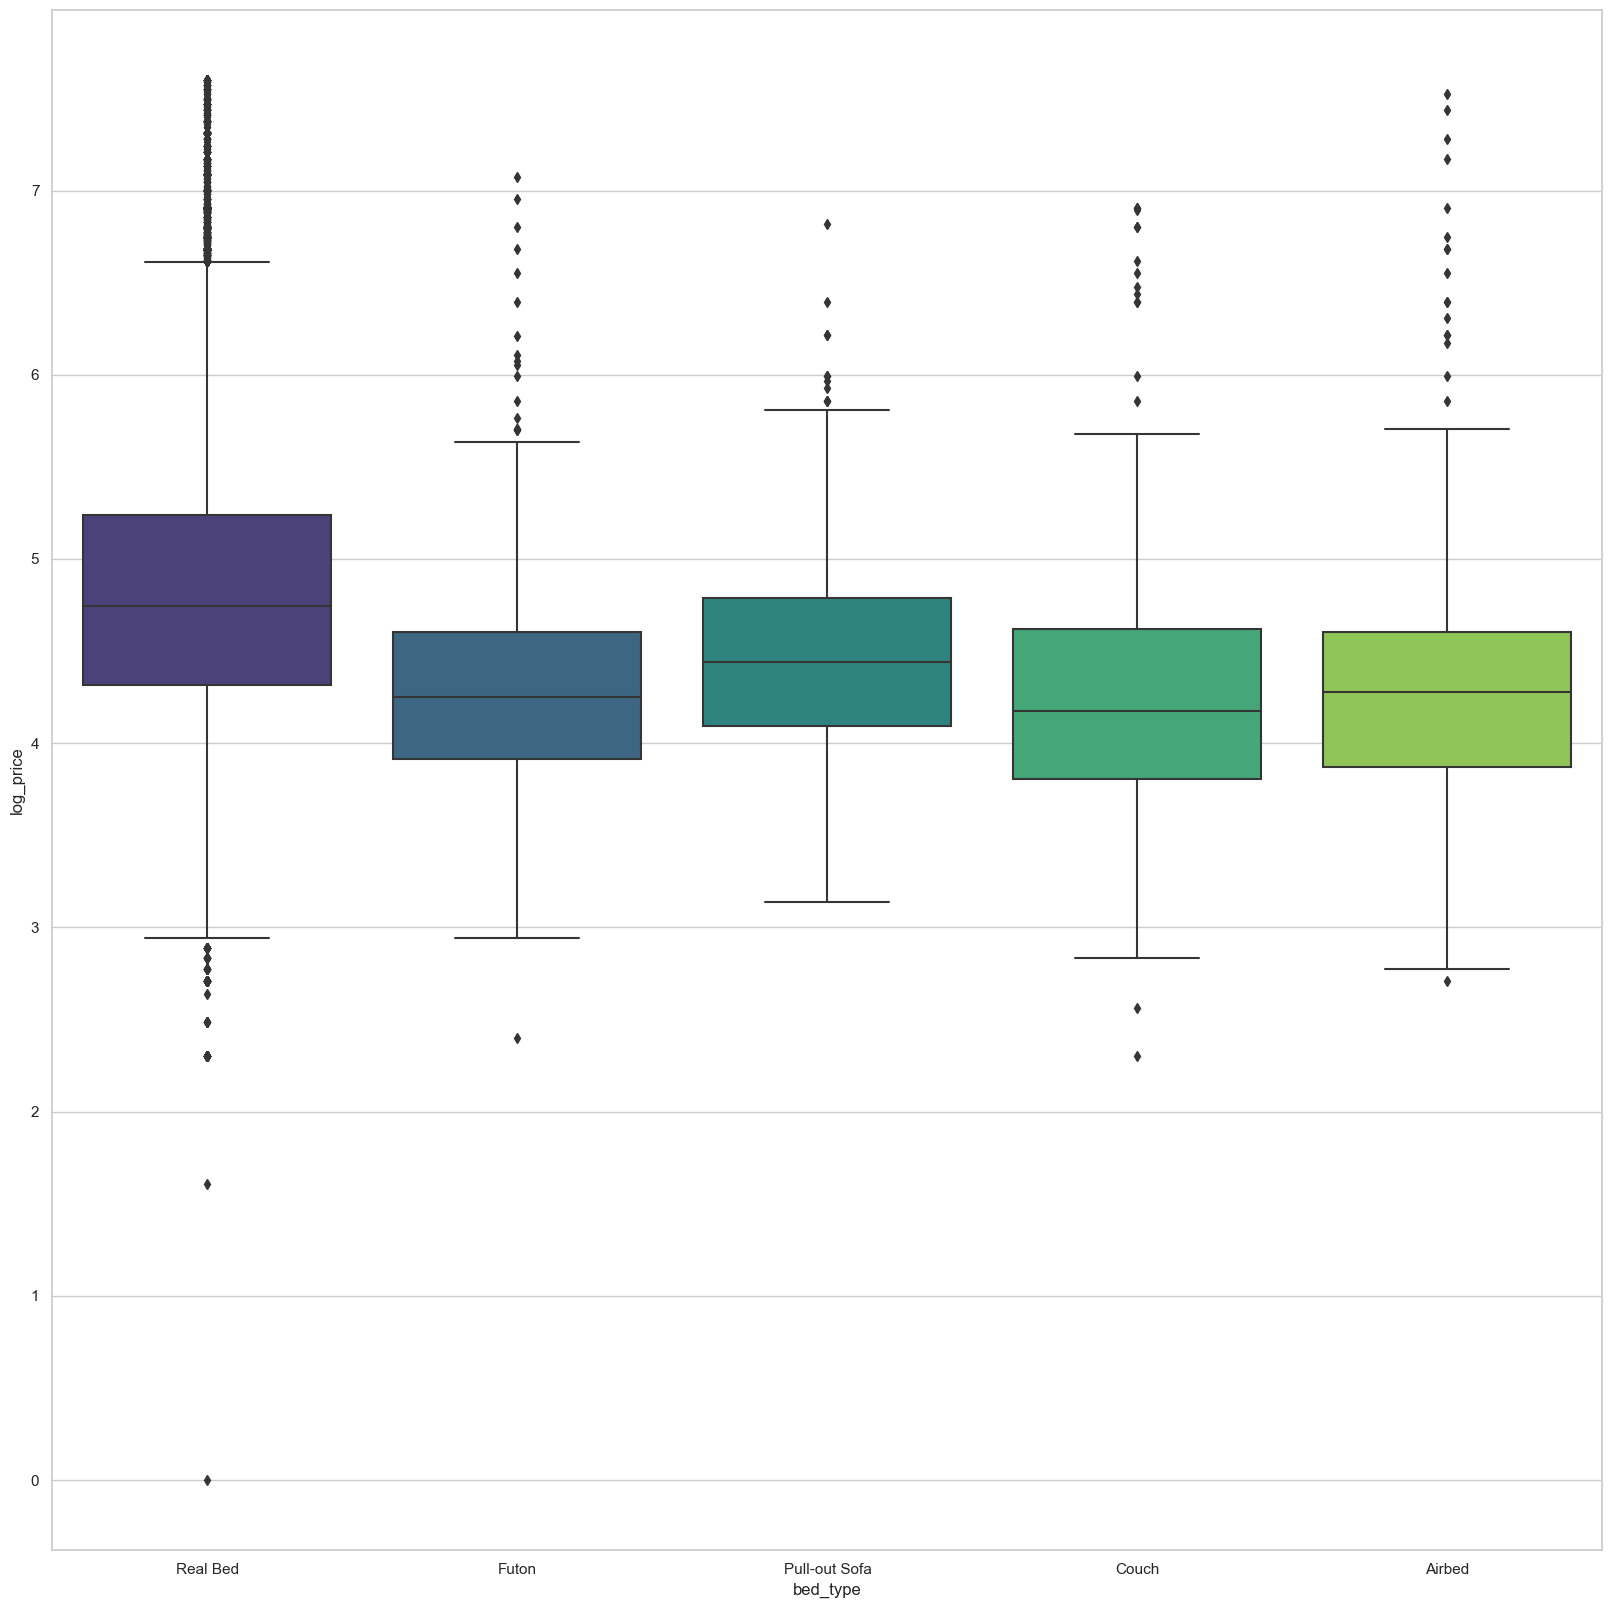

In [20]:
#box plot
sns.set(style="whitegrid")
plt.figure(figsize=(20,20))
sns.boxplot(x="bed_type", y="log_price", data=air,palette = "viridis")

<Axes: xlabel='review_scores_rating', ylabel='Density'>

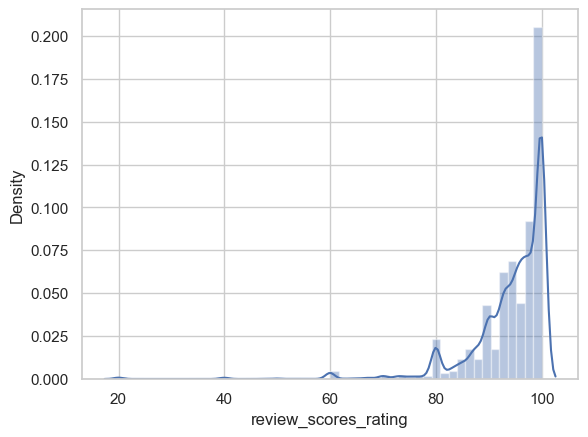

In [21]:
sns.distplot(air["review_scores_rating"])

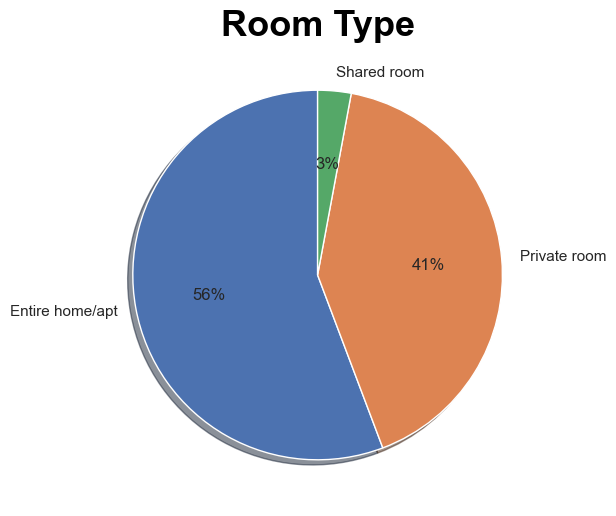

In [22]:
#pie chart for bed type
air_bed=air['room_type'].value_counts()
labels=air_bed.index
fig,ax1=plt.subplots(1,1,figsize=(6,6))
ax1.pie(air_bed,labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
plt.title("Room Type",fontsize=26, weight = 'bold',color="black")
plt.show()

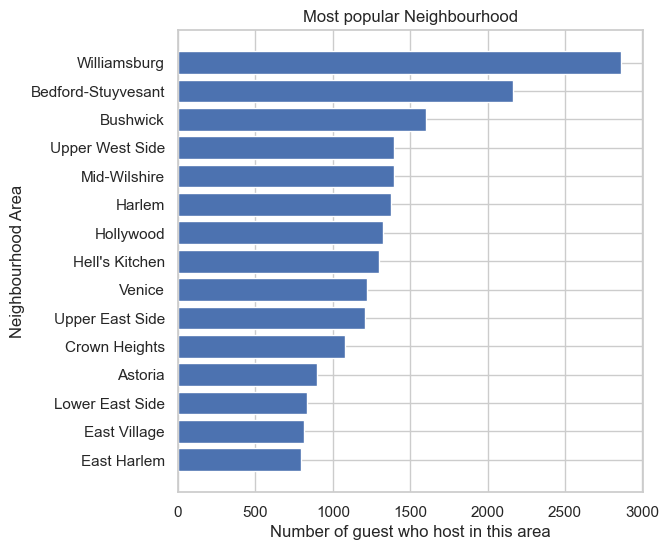

In [23]:
data = air.neighbourhood.value_counts()[:15]
plt.figure(figsize=(6,6))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

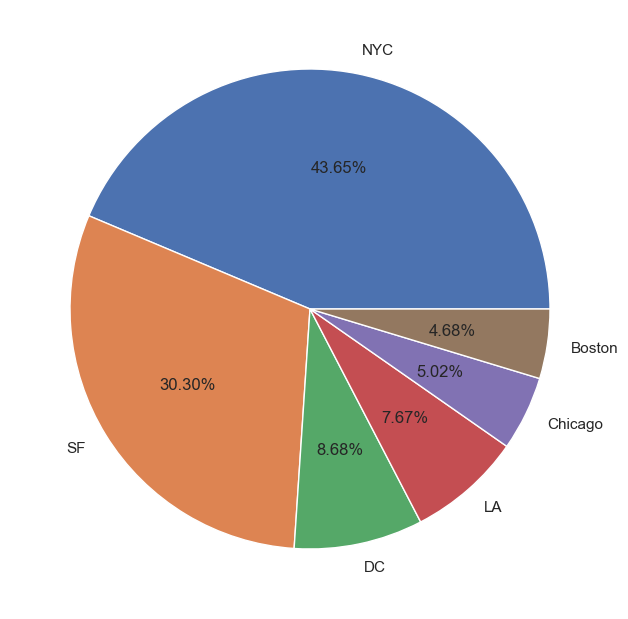

In [24]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(air.city.unique())
students =list(air.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

In [25]:
import plotly.express as px

def create_map(city):
    price_view = lambda x: 'price: ' + str(round(x, 2))

    if city in {'NYC', 'LA'}:
        fraction = 0.2
    else:
        fraction = 0.6
        
    df_temp = air[air['city'] == city].sample(frac=fraction,random_state=101)
    df_temp['log_price'] = np.round(df_temp['log_price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["log_price"],
                            color='log_price', 
                            zoom=10)
    fig.update_layout(
            title = f'Airbnb prices in {city}',
            geo_scope='usa',
            width=1000, 
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    #fig.update_geos(fitbounds="locations")
    fig.show()
    
#city = interact(lambda x: create_map(x), x=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget
create_map('NYC')


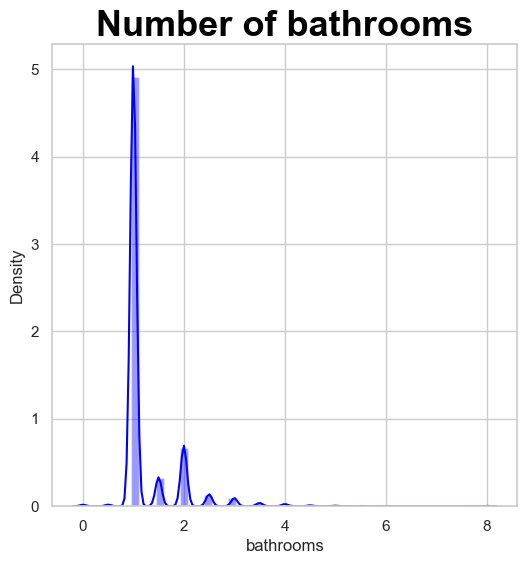

In [26]:
#histogram for number of bathrooms
plt.figure(figsize=(6,6))
sns.distplot(air['bathrooms'],color='blue')
plt.title("Number of bathrooms",fontsize=26, weight = 'bold',color="black")
plt.show()

In [27]:
def pie_col(column):
  air[column].value_counts().plot.pie(autopct='%1.0f%%')

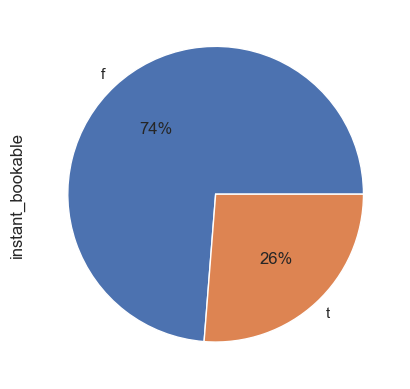

In [28]:
pie_col('instant_bookable')

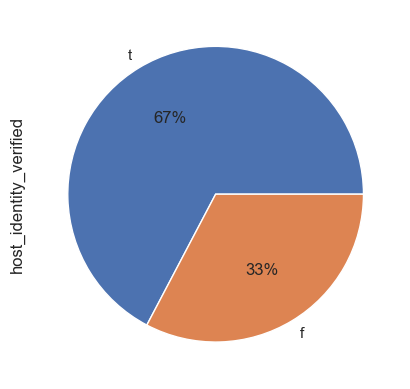

In [29]:
pie_col('host_identity_verified')


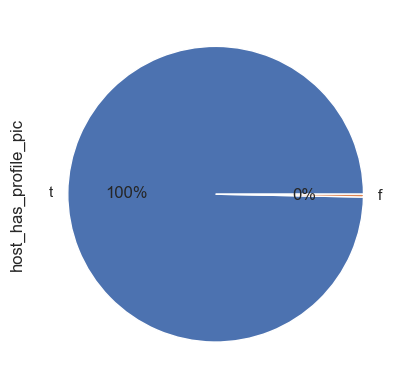

In [30]:
pie_col('host_has_profile_pic')


<Axes: >

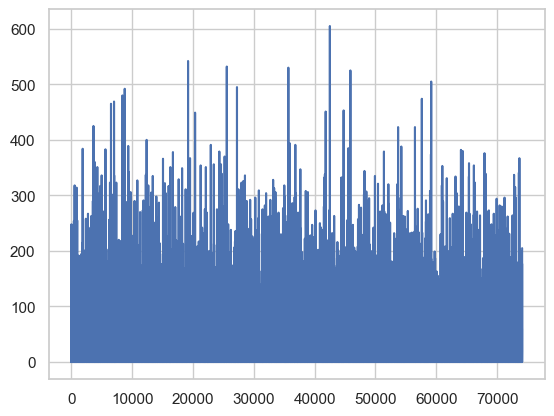

In [31]:
air.number_of_reviews.plot()


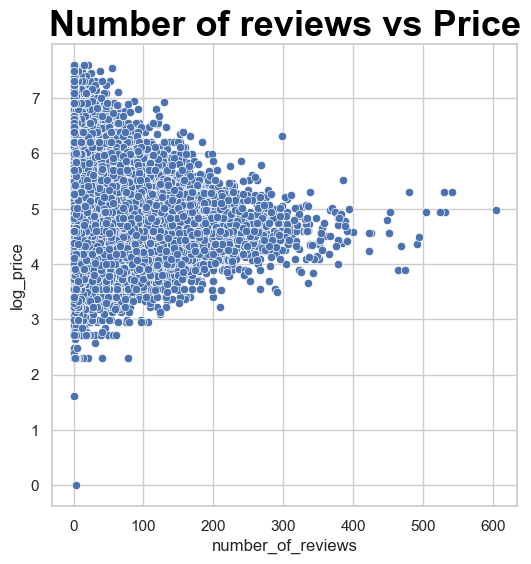

In [32]:
#scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot(x="number_of_reviews", y="log_price", data=air,palette = "viridis")
plt.title("Number of reviews vs Price",fontsize=26, weight = 'bold',color="black")
plt.show()

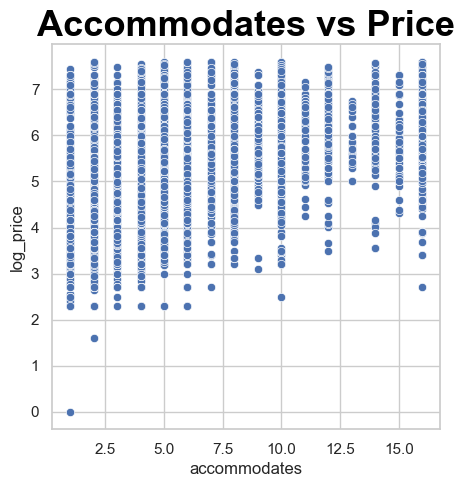

In [33]:
#scatter plot for log price and accommodates
plt.figure(figsize=(5,5))
sns.scatterplot(x="accommodates", y="log_price", data=air,palette = "viridis")
plt.title("Accommodates vs Price",fontsize=26, weight = 'bold',color="black")
plt.show()

In [34]:
#drop the null values
air.dropna(inplace=True)

In [35]:

#columns of the data
air.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

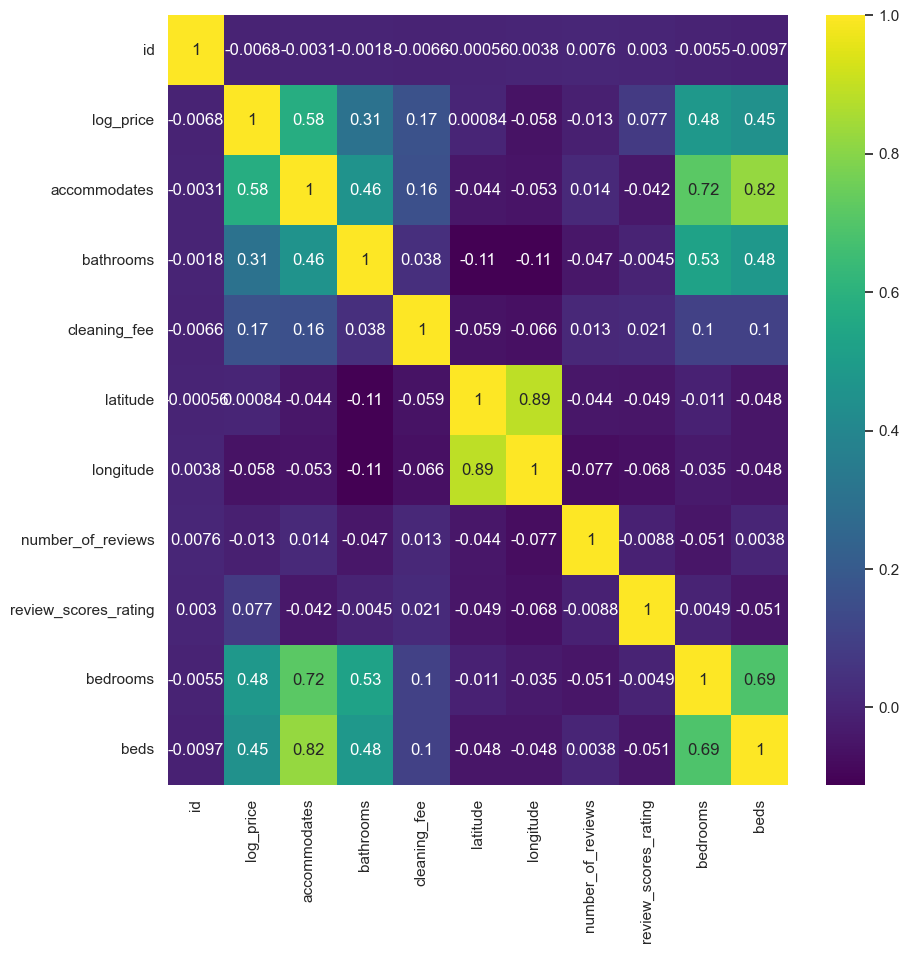

In [36]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(air.corr(),annot=True,cmap='viridis')
plt.show()

In [37]:
#one hot encoding for 'bed_type','cancellation_policy','city','host_has_profile_pic',host_identity_verified','host_response_rate','instant_bookable'
air=pd.get_dummies(air,columns=['bed_type','cancellation_policy','city','host_has_profile_pic','host_identity_verified','instant_bookable','cleaning_fee'],drop_first=True)



In [38]:
#The above code is performing one hot encoding for the following columns by providing the dummy variables for the categorical variables

In [39]:
#dataset after one hot encoding
air.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,description,first_review,host_response_rate,...,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t,cleaning_fee_True
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Enjoy travelling during your stay in Manhattan...,2017-08-05,100%,...,0,0,0,0,1,0,1,0,1,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,The Oasis comes complete with a full backyard ...,2017-04-30,100%,...,0,0,0,0,1,0,1,1,1,1
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Beautiful private room overlooking scenic view...,2017-08-27,100%,...,0,0,0,0,0,1,1,1,1,1
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Arguably the best location (and safest) in dow...,2016-12-16,100%,...,0,0,0,1,0,0,1,1,0,1
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Garden Studio with private entrance from the s...,2016-02-13,100%,...,0,0,0,0,0,1,1,0,0,1


In [40]:
#label encoding for 'room_type'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
air['room_type']=le.fit_transform(air['room_type'])

In [41]:
#label encoding for 'property_type'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
air['property_type']=le.fit_transform(air['property_type'])

In [42]:
#Performing label encoding for the following columns room_type and property_type

In [43]:
#correlation
air.corr()

,id,log_price,property_type,room_type,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,...,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t,cleaning_fee_True
id,1.000000,-0.006781,0.005942,0.003541,-0.003127,-0.001764,-0.000562,0.003805,0.007568,0.003028,...,0.004451,-0.002447,0.003875,0.000317,0.008058,-0.006439,0.000493,0.002810,0.001697,-0.006593
log_price,-0.006781,1.000000,0.000583,-0.643286,0.582122,0.306656,0.000838,-0.058250,-0.012966,0.077415,...,0.027822,-0.086989,-0.015496,-0.053749,-0.036941,0.184661,-0.013092,0.034164,-0.037229,0.168688
property_type,0.005942,0.000583,1.000000,0.096259,0.123561,0.229798,-0.283007,-0.279355,0.032169,0.051206,...,0.011664,-0.018349,0.082841,0.248039,-0.288164,0.080882,-0.001118,0.029798,-0.003868,0.009894
room_type,0.003541,-0.643286,0.096259,1.000000,-0.455598,-0.066426,0.051646,0.058571,-0.014096,-0.034279,...,-0.010658,0.005288,-0.025559,-0.045274,0.083699,-0.027673,0.006922,-0.034568,0.014172,-0.213652
accommodates,-0.003127,0.582122,0.123561,-0.455598,1.000000,0.459658,-0.044072,-0.052788,0.013727,-0.042076,...,0.015182,0.054460,0.014644,0.051386,-0.086880,-0.002910,-0.010326,0.030628,0.059250,0.158999
bathrooms,-0.001764,0.306656,0.229798,-0.066426,0.459658,1.000000,-0.108317,-0.112451,-0.047015,-0.004484,...,0.012110,0.016616,0.027930,0.103061,-0.132303,0.023634,-0.003962,0.009127,0.011283,0.038207
latitude,-0.000562,0.000838,-0.283007,0.051646,-0.044072,-0.108317,1.000000,0.887929,-0.044096,-0.048768,...,0.004606,0.257930,0.013271,-0.931139,0.609407,-0.106246,-0.002511,-0.079838,0.006165,-0.058599
longitude,0.003805,-0.058250,-0.279355,0.058571,-0.052788,-0.112451,0.887929,1.000000,-0.077466,-0.067560,...,0.000055,0.037080,0.167170,-0.761613,0.734695,-0.472357,0.001685,-0.086641,0.007336,-0.065818
number_of_reviews,0.007568,-0.012966,0.032169,-0.014096,0.013727,-0.047015,-0.044096,-0.077466,1.000000,-0.008804,...,-0.007552,0.012254,0.011197,0.020663,-0.086380,0.086334,0.010881,0.136747,0.048928,0.013265
review_scores_rating,0.003028,0.077415,0.051206,-0.034279,-0.042076,-0.004484,-0.048768,-0.067560,-0.008804,1.000000,...,-0.015732,0.035908,0.029517,0.032164,-0.077632,0.047511,0.011782,0.056272,-0.091001,0.021424


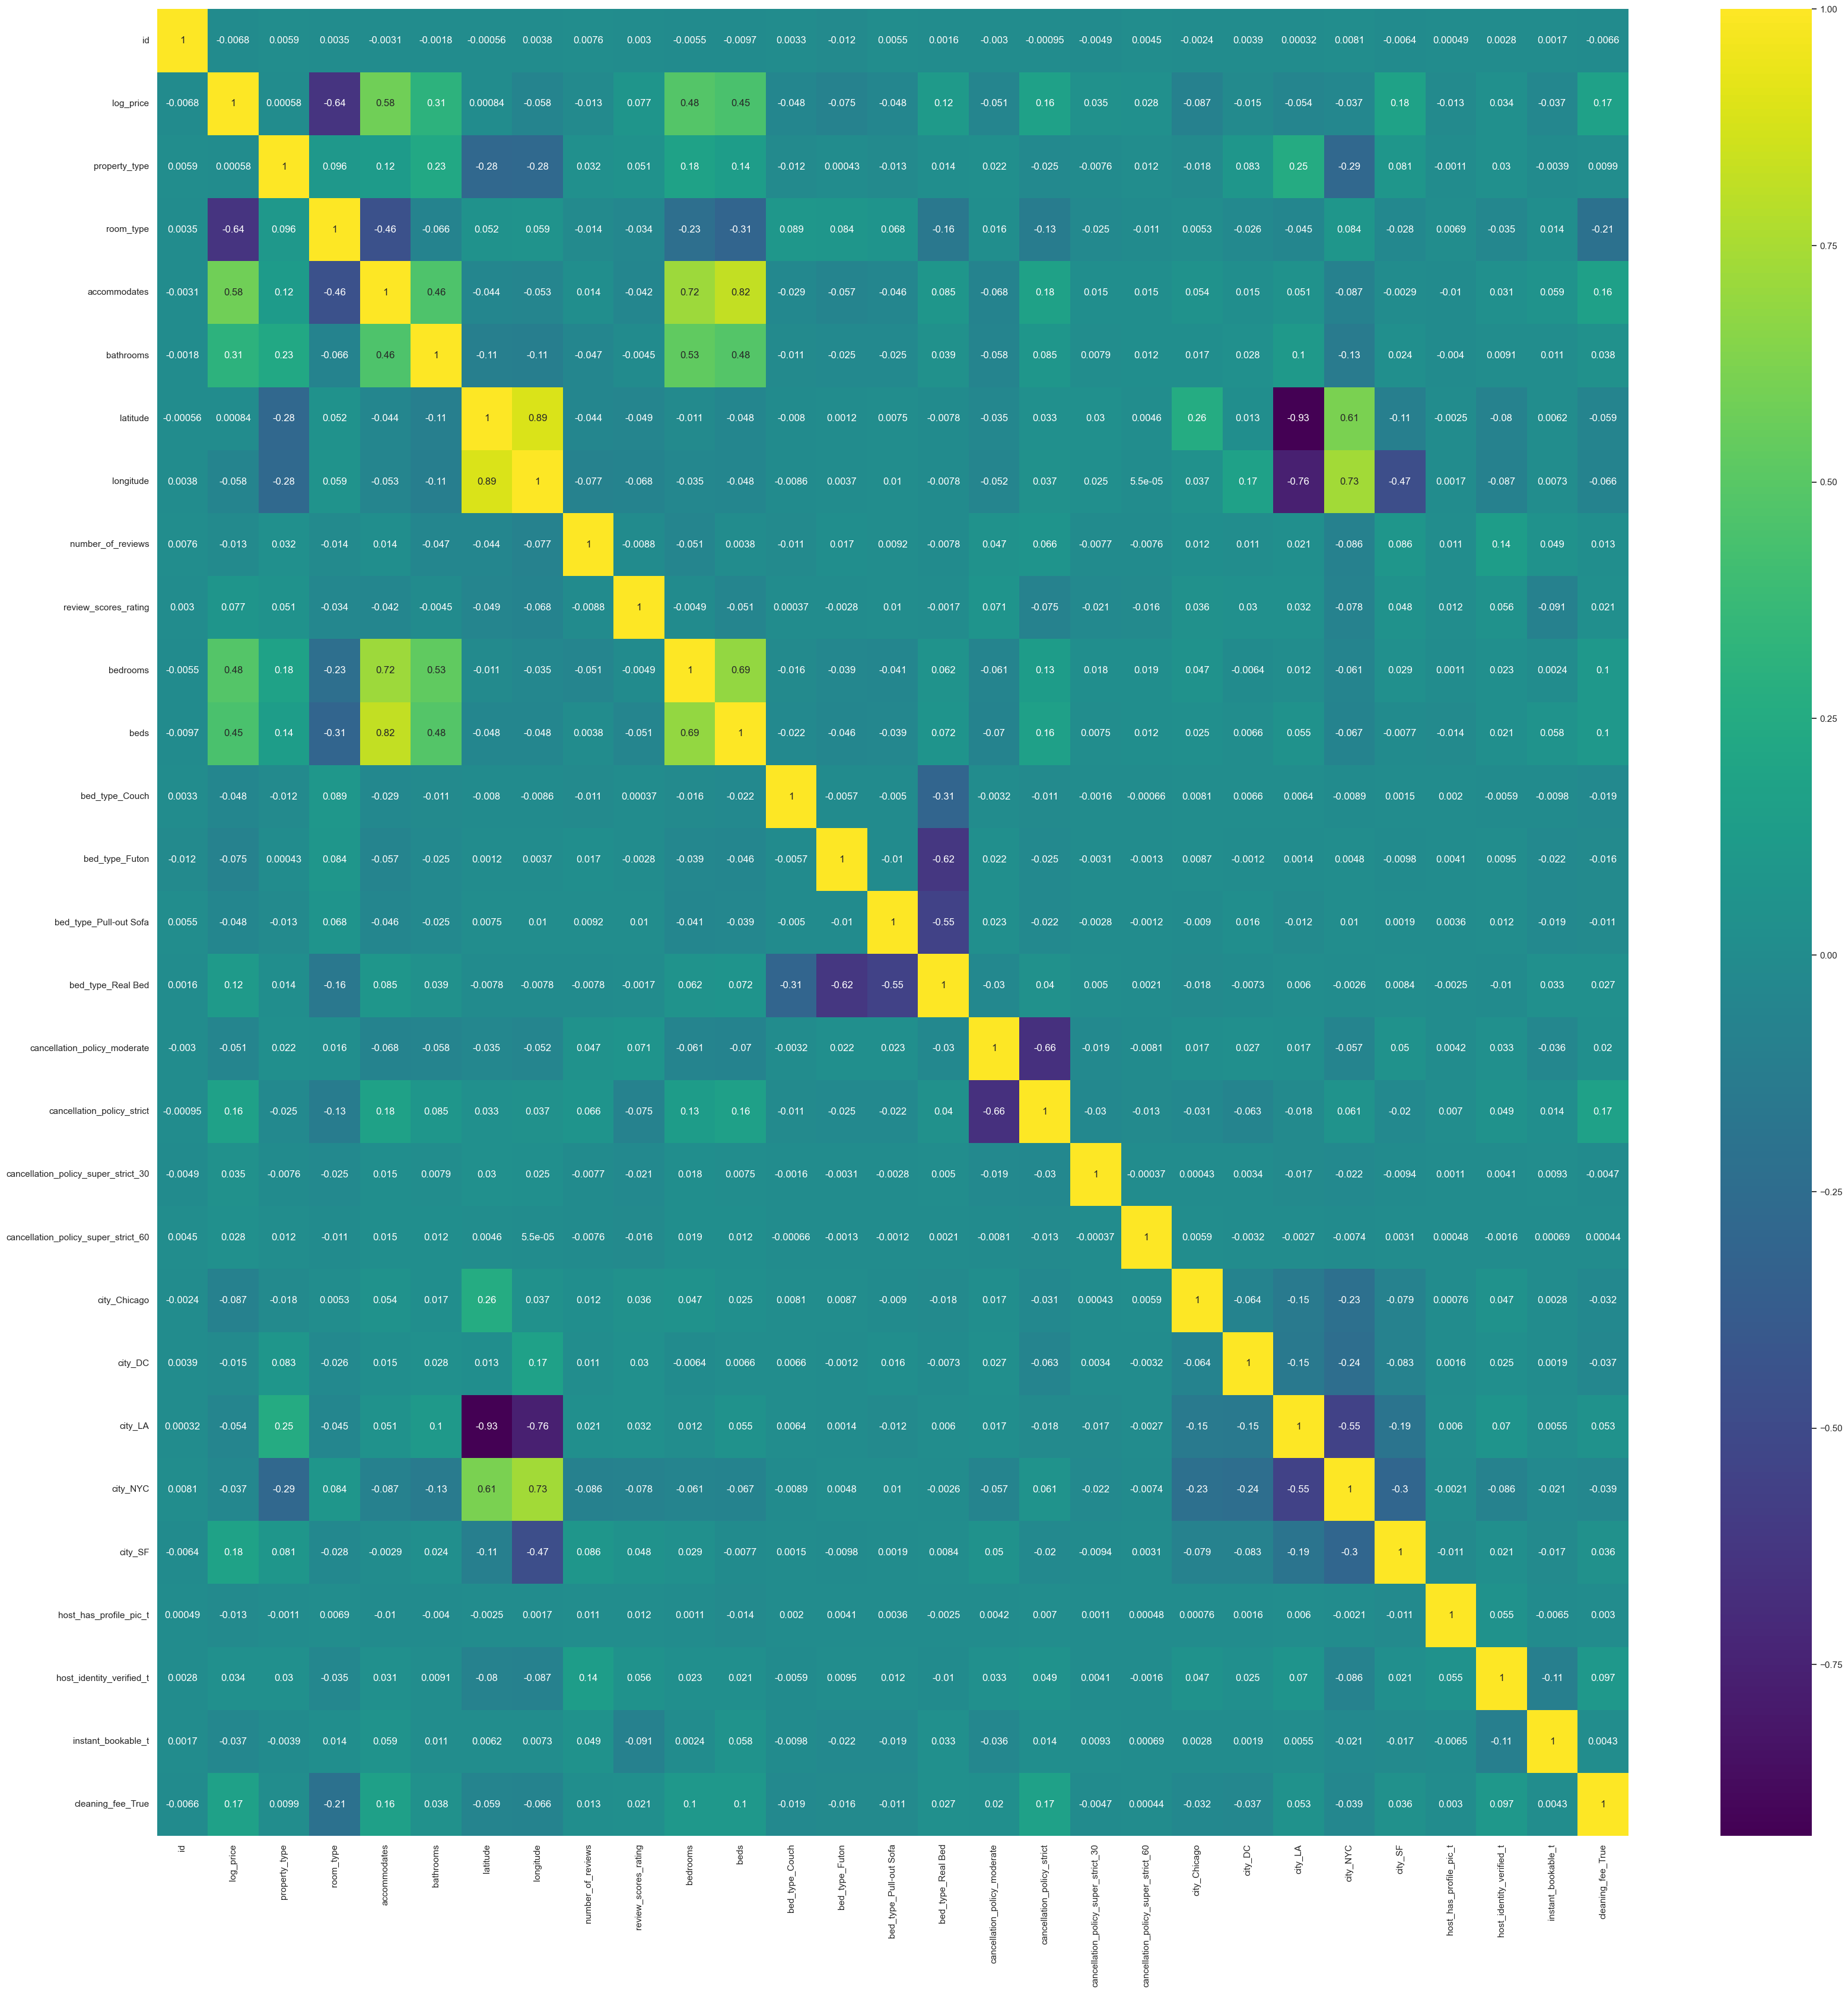

In [44]:
#correlation matrix
plt.figure(figsize=(40,40))
sns.heatmap(air.corr(),annot=True,cmap='viridis')
plt.show()

In [45]:
#split the data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(air, test_size = 0.2, random_state = 123)
#shape of the train and test data
train.shape
test.shape

(7701, 39)

In [46]:
#creating a dataset for xtrain and ytrain for all linear regression
xtrain = train.drop(['id','amenities','description','host_since','last_review','latitude','longitude','name','neighbourhood','thumbnail_url','zipcode','log_price','first_review','host_response_rate'], axis = 1)
ytrain = train['log_price']

In [47]:
#Dropping the columns 'id','amenities','description','host_since','last_review','latitude','longitude','name','neighbourhood','thumbnail_url','zipcode','log_price','first_review','host_response_rate'
#Which is not required for the model

In [48]:
#creating a dataset for xtest and ytest for all linear regression
xtest = test.drop(['id','amenities','description','host_since','last_review','latitude','longitude','name','neighbourhood','thumbnail_url','zipcode','log_price','first_review','host_response_rate'], axis = 1)
ytest = test['log_price']


In [49]:
#Statsmodel for linear regression

In [50]:
mod=smf.ols('log_price~number_of_reviews+review_scores_rating+cleaning_fee_True+host_response_rate+instant_bookable_t+bedrooms',air)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     166.8
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        04:28:20   Log-Likelihood:                -32779.
No. Observations:               38502   AIC:                         6.572e+04
Df Residuals:                   38421   BIC:                         6.641e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [51]:
mod=smf.ols('log_price~property_type+room_type+accommodates+bathrooms+bedrooms+beds',air)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     7956.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        04:28:20   Log-Likelihood:                -22992.
No. Observations:               38502   AIC:                         4.600e+04
Df Residuals:                   38495   BIC:                         4.606e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.5355      0.006    700.215

In [52]:
# Exporting the processed data
#air.to_excel('processed_data.xlsx', index=False)

In [53]:
# Create a model with the above dataset with sklear linear model
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [54]:
#score of the model
model.score(xtrain, ytrain)

0.6079624496821026

In [55]:
#coefficients of the model
model.coef_

array([-1.47885673e-03, -5.91870372e-01,  8.17777182e-02,  1.28725273e-01,
       -2.59988528e-04,  7.20411431e-03,  1.42185416e-01, -4.44172906e-02,
        4.92185697e-02, -6.02831148e-02,  3.44848656e-02,  1.14630617e-02,
        1.54013106e-02,  6.19592732e-02,  3.94015200e-01,  8.73752917e-01,
       -3.63798140e-01, -1.47078737e-01, -1.69035432e-01, -3.30777463e-02,
        2.68442878e-01, -9.65721093e-02,  1.51041960e-02, -4.83064771e-02,
       -1.34916255e-02])

In [56]:
#intercept of the model
model.intercept_

3.966154888026037

In [57]:
#predicting the model
ypred = model.predict(xtest)
ypred

array([4.68076884, 5.44336417, 4.04850101, ..., 4.76891415, 4.28242113,
       5.38405655])

In [58]:
#RMSE of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, ypred))
rms

0.41546579478082274

In [59]:
#MAE of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, ypred)
mae

0.3200000532313577

In [60]:
#stepwise selection
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=18, step=1)
selector = selector.fit(xtrain, ytrain)

In [61]:
selector.support_

array([False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False])

In [62]:
selector.ranking_

array([7, 1, 1, 1, 8, 6, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 5])

In [63]:
selector.score(xtrain, ytrain)

0.6019965142124986

In [64]:
#K-Nearst Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(xtrain, ytrain)

KNeighborsRegressor()

In [65]:
#score of the model
neigh.score(xtrain, ytrain)

0.6427375327417982

In [66]:
#predict the model
y_pred = neigh.predict(xtest)
y_pred

array([4.9285076 , 5.31234958, 4.39988265, ..., 4.65157406, 4.30326751,
       5.28289897])

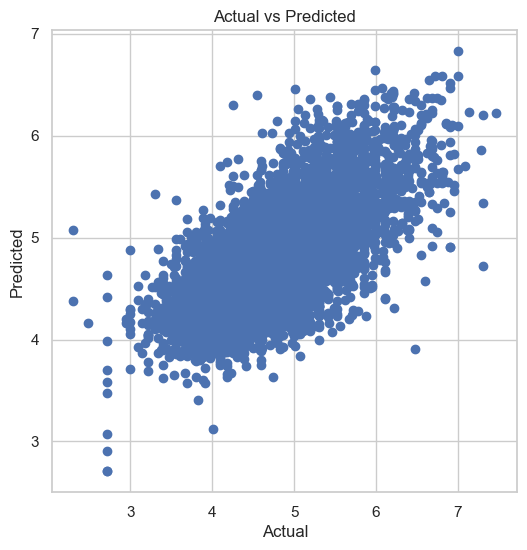

In [67]:
#plot the graph for actual and predicted values
plt.figure(figsize=(6,6))
plt.scatter(ytest, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [68]:
#RMSE of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.4771145300453562

In [69]:
#MAE of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_pred)
mae


0.37246817316860154

In [70]:
models = [KNeighborsRegressor(n_neighbors=i) for i in range(1,10)]
[model.fit(xtrain,ytrain).score(xtrain,ytrain) for model in models]

[0.9550393956980024,
 0.7777822945905469,
 0.7102446584402732,
 0.6694937672807223,
 0.6427375327417982,
 0.6249882617896749,
 0.6100546406008927,
 0.5982542355507463,
 0.5890965848592387]

In [71]:
# LASSO regression  

In [72]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [73]:
clf.coef_

array([-0.00192529, -0.19077437,  0.13792156,  0.        , -0.00023979,
        0.00712072,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ])

In [74]:
clf.intercept_

3.735387099666234

In [75]:
#score of the model
clf.score(xtrain, ytrain)

0.4463153938328285

In [76]:
np.abs(clf.coef_).sum()

0.3379817370503003

In [77]:
#predict the model
y_pred = clf.predict(xtest)
y_pred


array([4.9137393 , 5.4609213 , 4.30220726, ..., 4.69490966, 4.48093169,
       5.44368354])

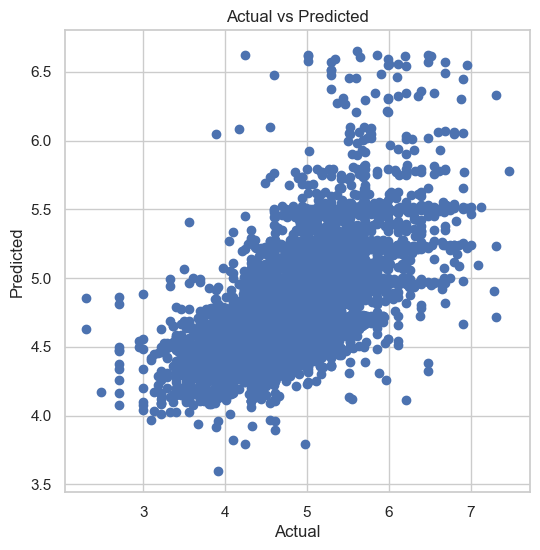

In [78]:
#plot the graph for actual and predicted values
plt.figure(figsize=(6,6))
plt.scatter(ytest, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [79]:
#RMSE of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.4898416869597266

In [80]:
#MAE of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_pred)
mae


0.37892984525159623

In [81]:
clf = linear_model.LassoCV()
clf.fit(xtrain, ytrain)

LassoCV()

In [82]:
clf.coef_

array([-1.49870635e-03, -5.90439280e-01,  8.12960428e-02,  1.25029242e-01,
       -2.42269882e-04,  7.16770205e-03,  1.41403795e-01, -4.13898101e-02,
        0.00000000e+00, -4.85863780e-04,  0.00000000e+00,  0.00000000e+00,
        3.19837877e-04,  4.82805038e-02,  0.00000000e+00,  0.00000000e+00,
       -3.16449418e-01, -1.00985487e-01, -1.33932914e-01, -0.00000000e+00,
        2.92670812e-01, -0.00000000e+00,  9.71830722e-03, -4.45650700e-02,
       -3.14740116e-03])

In [83]:
clf.intercept_

3.8585159731385827

In [84]:
clf.mse_path_

array([[0.44216445, 0.43777794, 0.43446515, 0.4241919 , 0.43090127],
       [0.42369019, 0.41971693, 0.41576769, 0.40531936, 0.41161283],
       [0.4065927 , 0.40246963, 0.39947453, 0.38895695, 0.39489185],
       [0.39169761, 0.38742355, 0.3852746 , 0.37477424, 0.38040022],
       [0.37871972, 0.37429503, 0.3728972 , 0.36248405, 0.36784409],
       [0.36740895, 0.36283715, 0.36210678, 0.35183683, 0.35696812],
       [0.35754132, 0.35282675, 0.35269832, 0.34261573, 0.34755047],
       [0.34893968, 0.34407351, 0.34447095, 0.33463236, 0.33939837],
       [0.34144044, 0.33642911, 0.33729434, 0.32770464, 0.33232795],
       [0.33490121, 0.32975123, 0.33103384, 0.32169834, 0.3261986 ],
       [0.32919809, 0.32366479, 0.32517407, 0.31650419, 0.32060558],
       [0.32397506, 0.31799061, 0.31989324, 0.3114267 , 0.31547355],
       [0.31893423, 0.31303658, 0.31529917, 0.30694013, 0.31104114],
       [0.31452127, 0.30871016, 0.31130251, 0.30305822, 0.30721512],
       [0.31065633, 0.30493081, 0.

In [85]:
clf.mse_path_.mean(1)

array([0.43390014, 0.4152214 , 0.39847713, 0.38391404, 0.37124802,
       0.36023157, 0.35064652, 0.34230298, 0.3350393 , 0.32871664,
       0.32302935, 0.31775183, 0.31305025, 0.30896146, 0.3054056 ,
       0.30231325, 0.29960163, 0.29710915, 0.29475926, 0.29271329,
       0.29093408, 0.28938685, 0.28804138, 0.28687137, 0.28585394,
       0.2782855 , 0.26878742, 0.26052673, 0.25334187, 0.24709339,
       0.24165801, 0.2369305 , 0.23281865, 0.22924228, 0.22613166,
       0.22342612, 0.22097974, 0.21787364, 0.2149268 , 0.21236412,
       0.21013615, 0.20819739, 0.20651051, 0.20504326, 0.20376703,
       0.20265765, 0.20162106, 0.19972857, 0.19755219, 0.19547418,
       0.19358976, 0.19193278, 0.19046288, 0.18900306, 0.18773326,
       0.18662865, 0.18553269, 0.18401223, 0.18261853, 0.18139924,
       0.18032045, 0.1793243 , 0.17837401, 0.17750789, 0.17675361,
       0.17609735, 0.17552684, 0.17503062, 0.17459902, 0.17422363,
       0.173897  , 0.17361291, 0.17336592, 0.17315108, 0.17295

In [86]:
clf.mse_path_.mean(1).argmin()

99

In [87]:
clf.alpha_

0.0008214786050306273

In [88]:
clf.alphas_[clf.mse_path_.mean(1).argmin()]

0.0008214786050306273

In [89]:
#predict the model
y_pred = clf.predict(xtest)
y_pred

array([4.69155334, 5.41931588, 4.06808141, ..., 4.76887874, 4.28283769,
       5.38977802])

In [90]:
#mean for the predicted values
clf.predict(xtest).mean()

4.747395919217097

In [91]:
clf.predict(xtest).var()

0.2636346006081649

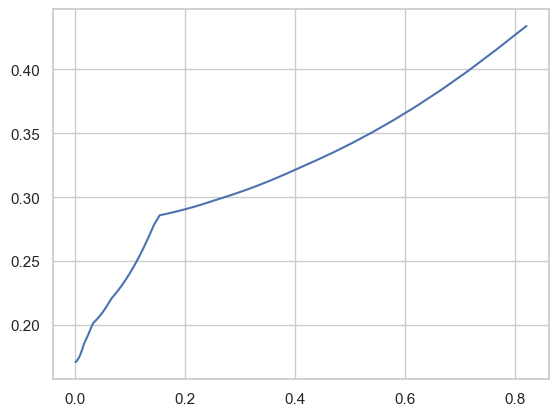

In [92]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [93]:
clf = linear_model.LassoCV(alphas=np.linspace(0.00001,0.01,200))
clf.fit(xtrain, ytrain)

LassoCV(alphas=array([1.00000000e-05, 6.02010050e-05, 1.10402010e-04, 1.60603015e-04,
       2.10804020e-04, 2.61005025e-04, 3.11206030e-04, 3.61407035e-04,
       4.11608040e-04, 4.61809045e-04, 5.12010050e-04, 5.62211055e-04,
       6.12412060e-04, 6.62613065e-04, 7.12814070e-04, 7.63015075e-04,
       8.13216080e-04, 8.63417085e-04, 9.13618090e-04, 9.63819095e-04,
       1.01402010e-03, 1.06422111e-0...
       8.84537688e-03, 8.89557789e-03, 8.94577889e-03, 8.99597990e-03,
       9.04618090e-03, 9.09638191e-03, 9.14658291e-03, 9.19678392e-03,
       9.24698492e-03, 9.29718593e-03, 9.34738693e-03, 9.39758794e-03,
       9.44778894e-03, 9.49798995e-03, 9.54819095e-03, 9.59839196e-03,
       9.64859296e-03, 9.69879397e-03, 9.74899497e-03, 9.79919598e-03,
       9.84939698e-03, 9.89959799e-03, 9.94979899e-03, 1.00000000e-02]))

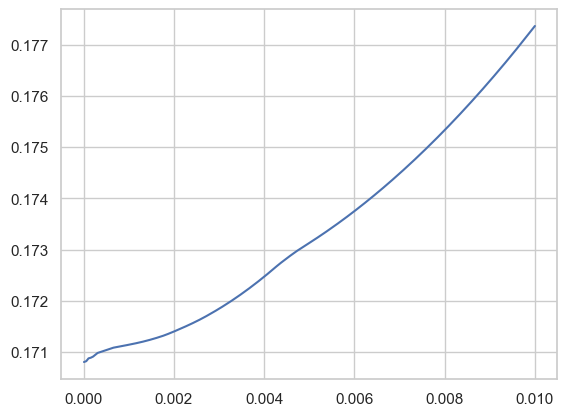

In [94]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [95]:
clf.alpha_

1e-05

In [96]:
clf.coef_

array([-1.47825332e-03, -5.91885393e-01,  8.17731925e-02,  1.28686131e-01,
       -2.59783717e-04,  7.20397009e-03,  1.42189004e-01, -4.43767775e-02,
        4.21490891e-02, -6.30236532e-02,  2.97433156e-02,  7.85246305e-03,
        1.51297127e-02,  6.17025179e-02,  3.82165037e-01,  8.11969366e-01,
       -3.63278421e-01, -1.46564753e-01, -1.68664451e-01, -3.27146349e-02,
        2.68696262e-01, -8.93547239e-02,  1.50164679e-02, -4.82563442e-02,
       -1.33694610e-02])

In [97]:
#score of the model
clf.score(xtrain, ytrain)


0.6079602420838804

In [98]:
#predict the model
y_pred = clf.predict(xtest)
y_pred

array([4.68088193, 5.44316318, 4.04881295, ..., 4.76891637, 4.28239923,
       5.38417314])

In [99]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.41547294090321635

In [100]:
#mae of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_pred)
mae

0.3200130516128017

In [101]:
#Ridge regression


In [102]:
from sklearn.linear_model import Ridge

In [103]:
clf = Ridge(alpha=1.0)
clf.fit(xtrain, ytrain)

Ridge()

In [104]:
clf.coef_

array([-1.47788148e-03, -5.91835597e-01,  8.17988575e-02,  1.28716274e-01,
       -2.60046644e-04,  7.20469641e-03,  1.42221279e-01, -4.44224209e-02,
        4.84788038e-02, -6.02699919e-02,  3.42195939e-02,  1.13416840e-02,
        1.51881766e-02,  6.17319560e-02,  3.79150012e-01,  7.27805775e-01,
       -3.63578139e-01, -1.47058378e-01, -1.69067061e-01, -3.31194123e-02,
        2.68295042e-01, -9.43472958e-02,  1.50881713e-02, -4.82958236e-02,
       -1.34536917e-02])

In [105]:
clf.intercept_

3.9641084743812263

In [106]:
#predict the model
y_pred = clf.predict(xtest)
y_pred

array([4.68070402, 5.44350677, 4.04870888, ..., 4.7688945 , 4.28240727,
       5.38418996])

In [107]:
#score of the model
clf.score(xtrain, ytrain)


0.6079540579842218

In [108]:
#RMSE of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms


0.41547090328922626

In [109]:
#elastic net regression

In [110]:
clf = linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)
clf.fit(xtrain, ytrain)

ElasticNet(alpha=0.1)

In [111]:
clf.coef_

array([-2.05649253e-03, -3.18398526e-01,  1.22984638e-01,  0.00000000e+00,
       -2.38717013e-04,  7.65975369e-03,  3.55322189e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00])

In [112]:
clf.intercept_

3.748548112485042

In [113]:
#predict the model
y_pred = clf.predict(xtest)
y_pred


array([4.91801188, 5.47424756, 4.25642252, ..., 4.76580178, 4.4228354 ,
       5.49039398])

In [114]:
#score of the model
clf.score(xtrain, ytrain)


0.49995301301278383

In [115]:
#RMSE of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.46622377481740596

In [116]:
clf = linear_model.ElasticNetCV(alphas=np.linspace(0.0001,0.01,500))
clf.fit(xtrain, ytrain)

ElasticNetCV(alphas=array([0.0001    , 0.00011984, 0.00013968, 0.00015952, 0.00017936,
       0.0001992 , 0.00021904, 0.00023888, 0.00025872, 0.00027856,
       0.0002984 , 0.00031824, 0.00033808, 0.00035792, 0.00037776,
       0.0003976 , 0.00041743, 0.00043727, 0.00045711, 0.00047695,
       0.00049679, 0.00051663, 0.00053647, 0.00055631, 0.00057615,
       0.00059599, 0.00061583, 0.00063567, 0.00065551, 0.00067535,...
       0.00932545, 0.00934529, 0.00936513, 0.00938497, 0.00940481,
       0.00942465, 0.00944449, 0.00946433, 0.00948417, 0.00950401,
       0.00952385, 0.00954369, 0.00956353, 0.00958337, 0.00960321,
       0.00962305, 0.00964289, 0.00966273, 0.00968257, 0.0097024 ,
       0.00972224, 0.00974208, 0.00976192, 0.00978176, 0.0098016 ,
       0.00982144, 0.00984128, 0.00986112, 0.00988096, 0.0099008 ,
       0.00992064, 0.00994048, 0.00996032, 0.00998016, 0.01      ]))

In [117]:
clf.coef_

array([-1.47686282e-03, -5.91775029e-01,  8.17941809e-02,  1.28500060e-01,
       -2.59071790e-04,  7.20285971e-03,  1.42225895e-01, -4.42287499e-02,
        1.98731744e-02, -6.72371750e-02,  1.71638207e-02,  0.00000000e+00,
        1.38224826e-02,  6.04280695e-02,  3.15806251e-01,  4.31541951e-01,
       -3.60742933e-01, -1.44378857e-01, -1.67130935e-01, -3.12560478e-02,
        2.69577082e-01, -5.84808058e-02,  1.46461512e-02, -4.80611601e-02,
       -1.28147118e-02])

In [118]:
clf.intercept_

3.938743526172273

In [119]:
clf.alpha_

0.0001

In [120]:
#score of the model
clf.score(xtrain, ytrain)


0.6078663193999656

In [121]:
#predict the model
y_pred = clf.predict(xtest)
y_pred

array([4.6812747 , 5.44248374, 4.05037506, ..., 4.76886557, 4.28239313,
       5.38477935])

In [122]:
#RMSE of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.4155337502432072

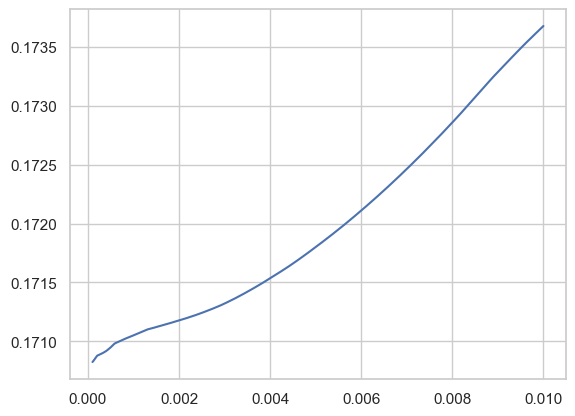

In [123]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [124]:
#least angle regression

In [125]:
from sklearn.preprocessing import scale 

clf = linear_model.Lars(n_nonzero_coefs=3,normalize=False)
clf.fit(scale(xtrain), ytrain)

Lars(n_nonzero_coefs=3, normalize=False)

In [126]:
clf.coef_

array([ 0.        , -0.24384703,  0.11303046,  0.        ,  0.        ,
        0.        ,  0.06688   ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [127]:
clf.intercept_

4.74486070661524

In [128]:
#score of the model
clf.score(scale(xtrain), ytrain)


0.49721475100776513

In [129]:
#predict the model
y_pred = clf.predict(scale(xtest))
y_pred

array([4.89275158, 5.26199664, 4.36875634, ..., 4.86609834, 4.42157528,
       5.34098129])

In [130]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.46460401694662296

In [131]:
clf = linear_model.LarsCV(normalize=False)
clf.fit(scale(xtrain), ytrain)

LarsCV(normalize=False)

In [132]:
clf.coef_

array([-1.13721809e-02, -3.23335271e-01,  1.73288388e-01,  7.05348899e-02,
       -1.14178953e-02,  4.84535866e-02,  1.18236919e-01, -5.52740880e-02,
        1.73657400e-03, -7.34513215e-03,  1.86898943e-03,  2.61542887e-05,
        6.00769121e-03,  2.99282961e-02,  1.12245892e-02,  1.08466504e-02,
       -8.31220942e-02, -3.39650744e-02, -7.18288097e-02, -1.36190091e-02,
        7.93811464e-02, -3.29290514e-03,  6.35563564e-03, -2.20415311e-02,
       -4.55218999e-03])

In [133]:
clf.score(scale(xtrain), ytrain)

0.6079488653751842

In [134]:
#predict the model
y_pred = clf.predict(scale(xtest))
y_pred

array([4.6827157 , 5.43478013, 4.05291121, ..., 4.76343558, 4.28291377,
       5.37962223])

In [135]:
#principal component regression

In [136]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

Text(0.5, 1.0, 'hp')

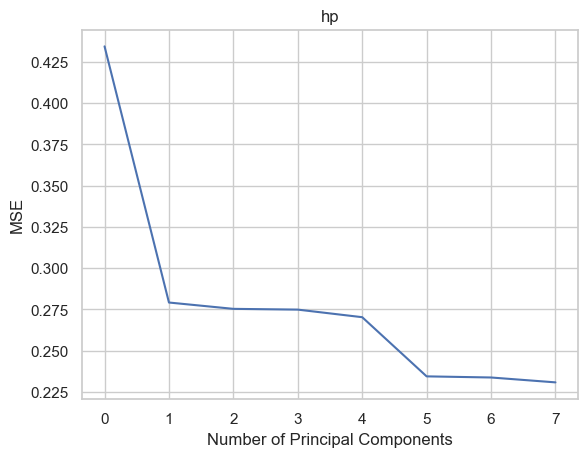

In [137]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(xtrain))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = linear_model.LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), ytrain, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 8):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], ytrain, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [138]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([13.01, 20.8 , 28.09, 34.22, 39.46, 44.2 , 48.7 , 53.12, 57.44,
       61.65, 65.68, 69.7 , 73.7 , 77.67, 81.56, 85.12, 88.58, 91.66,
       94.22, 96.2 , 97.43, 98.59, 99.22, 99.63, 99.99])

In [139]:
#sp lines

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [141]:
# polynomial features
for degree in [1,2,3,4]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xtrain.iloc[:,2:15], ytrain)
    print(degree,model.score(xtrain.iloc[:,2:15], ytrain))

1 0.3796977787818977
2 0.44430499103080556
3 0.4831421417281384
4 0.5075630361369645


In [142]:
# B-spline with 5 + 3 - 1 = 7 basis functions
model = make_pipeline(SplineTransformer(n_knots=5, degree=3), LinearRegression())
model.fit(xtrain, ytrain)
model.score(xtrain, ytrain)

0.6224902216943811

In [143]:
# B-spline with 10 + 5 - 4 = 14 basis functions
model = make_pipeline(SplineTransformer(n_knots=10, degree=5), LinearRegression())
model.fit(xtrain, ytrain)
model.score(xtrain, ytrain)

0.6255932954867554

In [144]:
#predicting the values
y_pred = model.predict(xtest)
y_pred


array([4.79296875, 5.37304688, 3.84960938, ..., 4.65039062, 4.27929688,
       5.55859375])

In [145]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

160.267272402259

In [146]:
#kernel smoothing

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 9.1000e+01, 1.5430e+03,
        1.0947e+04, 1.3085e+04, 4.1410e+03, 8.4400e+02, 1.4800e+02]),
 array([0.        , 0.76004023, 1.52008047, 2.2801207 , 3.04016093,
        3.80020117, 4.5602414 , 5.32028163, 6.08032187, 6.8403621 ,
        7.60040233]),
 <BarContainer object of 10 artists>)

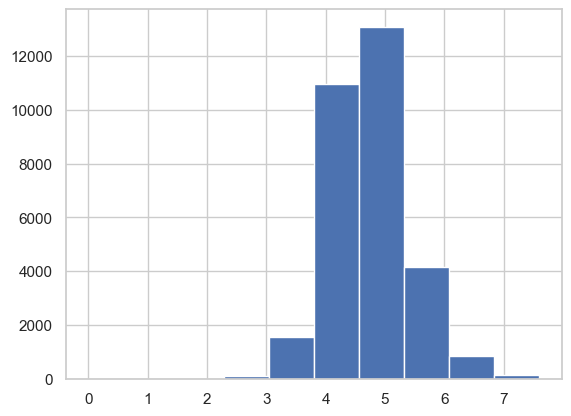

In [147]:
import matplotlib.pyplot as plt

plt.hist(ytrain)

(array([1.0000e+00, 1.0000e+00, 1.1700e+02, 6.2310e+03, 1.8013e+04,
        5.9140e+03, 5.0800e+02, 1.6000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
         5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
        10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
        15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ]),
 <BarContainer object of 19 artists>)

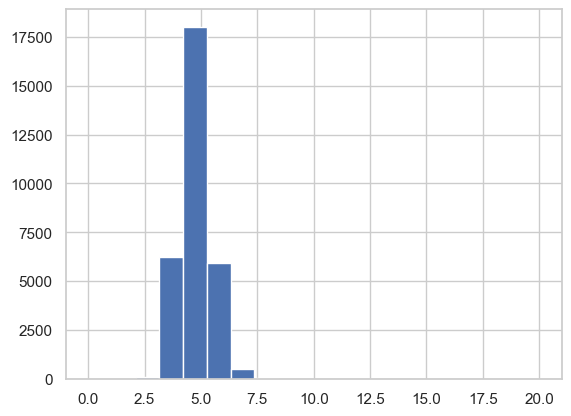

In [148]:
plt.hist(ytrain,np.linspace(0, 20,20))

(array([  13.,   45.,  484., 1630., 2520., 1848.,  809.,  249.,   89.,
          14.]),
 array([2.30258509, 2.81906369, 3.33554229, 3.85202089, 4.36849948,
        4.88497808, 5.40145668, 5.91793527, 6.43441387, 6.95089247,
        7.46737107]),
 <BarContainer object of 10 artists>)

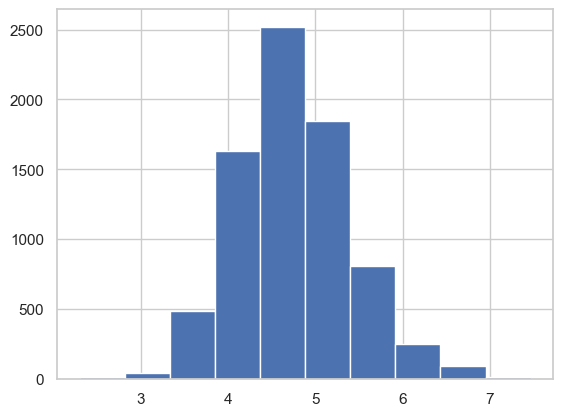

In [149]:
#plot the histogram for ytest
plt.hist(ytest)


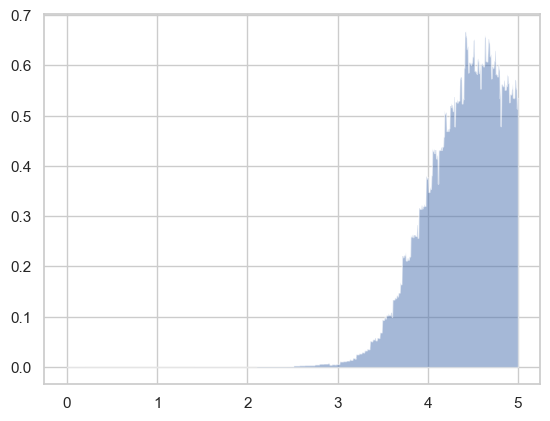

In [150]:
from sklearn.neighbors import KernelDensity

x = np.linspace(0,5,1000)
kde = KernelDensity(kernel="tophat", bandwidth=0.2).fit(ytrain[:,None])
log_dens = kde.score_samples(x[:,None])
plt.fill_between(x, np.exp(log_dens), alpha=0.5)

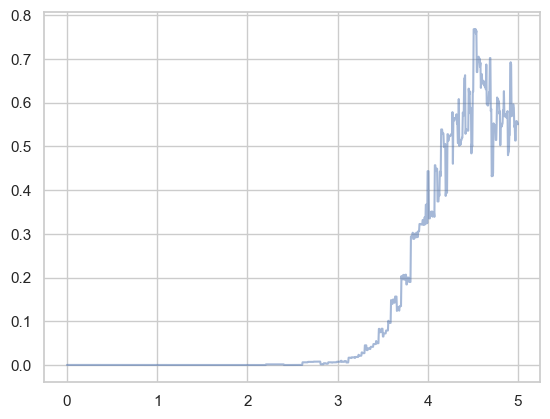

In [151]:
x = np.linspace(0,5,1000)
kde = KernelDensity(kernel="tophat", bandwidth=0.1).fit(ytrain[:,None])
log_dens = kde.score_samples(x[:,None])
plt.plot(x, np.exp(log_dens), alpha=0.5)

In [152]:
#SVM regression

In [153]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [154]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [155]:
regr.predict(xtest)

array([4.82681361, 5.00847938, 3.97891247, ..., 4.71316757, 4.27341476,
       5.28571532])

In [156]:
#score of the model
regr.score(xtrain, ytrain)

0.6822533627915817

In [157]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel='sigmoid'))
regr.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='sigmoid'))])

In [158]:
#score of the model
regr.score(xtrain, ytrain)


-57042.2778007844

In [159]:
#predicting the values
y_pred = regr.predict(xtest)
y_pred

array([ 11.1069507 , -10.89578703,  -1.08925152, ...,  20.15170326,
         1.19601229, 202.30581737])

In [160]:
##SVM outliers

In [161]:
from sklearn.svm import OneClassSVM

In [162]:
clf = make_pipeline(StandardScaler(), OneClassSVM(gamma='auto'))
clf.fit(xtrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('oneclasssvm', OneClassSVM(gamma='auto'))])

In [163]:
#predicting the values
y_pred = clf.predict(xtest)
y_pred

array([-1, -1,  1, ...,  1,  1, -1], dtype=int64)

In [164]:
np.unique(clf.predict(xtrain),return_counts=True)

(array([-1,  1], dtype=int64), array([15400, 15401], dtype=int64))

In [165]:
p=clf.predict(xtrain)

In [166]:
#decision tree regression
from sklearn import tree

In [167]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(xtrain, ytrain)

In [168]:
#score of the model
clf.score(xtrain, ytrain)

0.9769832931812044

In [169]:
#predicting the values
y_pred = clf.predict(xtest)
y_pred

array([5.29831737, 4.70048037, 3.68887945, ..., 4.59511985, 3.8501476 ,
       5.66988092])

In [170]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.5502758496747728

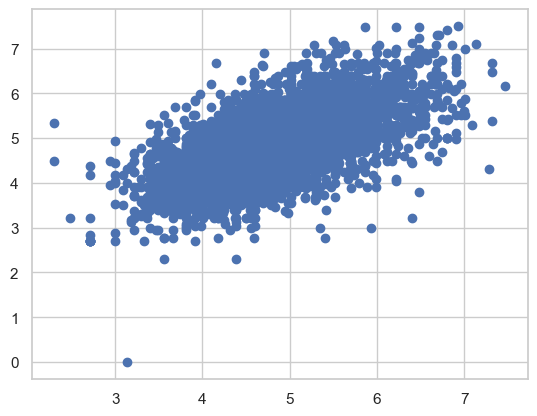

In [171]:
#plot the predicted values vs actual values
plt.scatter(ytest, y_pred)


In [172]:
#mae of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_pred)
mae

0.4171219910525442

In [173]:
clf = tree.DecisionTreeRegressor(max_depth=9)
clf.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=9)

In [174]:
clf.score(xtrain, ytrain)

0.6575023386054906

[Text(0.5562392979452054, 0.95, 'x[1] <= 0.5\nsquared_error = 0.434\nsamples = 30801\nvalue = 4.745'),
 Text(0.2953553082191781, 0.85, 'x[3] <= 1.25\nsquared_error = 0.302\nsamples = 17198\nvalue = 5.117'),
 Text(0.1485873287671233, 0.75, 'x[6] <= 1.5\nsquared_error = 0.196\nsamples = 13453\nvalue = 4.976'),
 Text(0.07448630136986302, 0.65, 'x[18] <= 0.5\nsquared_error = 0.17\nsamples = 10049\nvalue = 4.904'),
 Text(0.0386986301369863, 0.55, 'x[16] <= 0.5\nsquared_error = 0.172\nsamples = 7249\nvalue = 4.967'),
 Text(0.018150684931506848, 0.45, 'x[17] <= 0.5\nsquared_error = 0.166\nsamples = 6839\nvalue = 4.987'),
 Text(0.008904109589041096, 0.35, 'x[2] <= 11.0\nsquared_error = 0.163\nsamples = 6051\nvalue = 5.017'),
 Text(0.005479452054794521, 0.25, 'x[5] <= 95.5\nsquared_error = 0.158\nsamples = 6040\nvalue = 5.014'),
 Text(0.0027397260273972603, 0.15, 'x[2] <= 3.5\nsquared_error = 0.147\nsamples = 2828\nvalue = 4.953'),
 Text(0.0013698630136986301, 0.05, 'squared_error = 0.141\nsamp

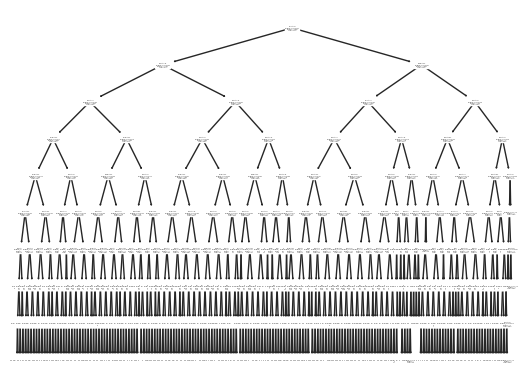

In [175]:
tree.plot_tree(clf)

In [176]:
#predicting the values
y_pred = clf.predict(xtest)
y_pred

array([4.75320177, 5.06564703, 4.02997974, ..., 4.70606635, 4.31598354,
       5.06564703])

In [177]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.4065147052780545

In [178]:
#Random forest regression


In [179]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [180]:
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=5, random_state=0)

In [181]:
#score of the model
regr.score(xtrain, ytrain)


0.609208936942992

In [182]:
#predicting the values
y_pred = regr.predict(xtest)
y_pred


array([4.72209271, 5.17991975, 4.03241452, ..., 4.74644725, 4.29556887,
       5.17381121])

In [183]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.41171016975693414

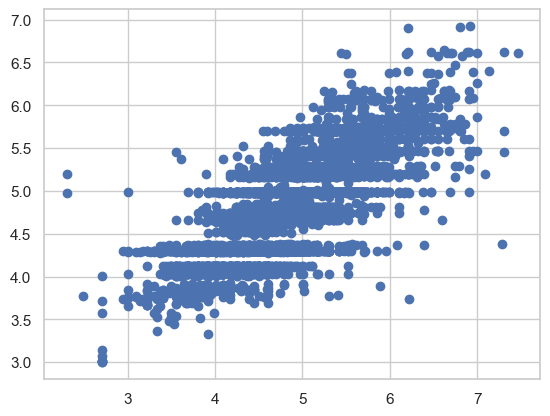

In [184]:
#plot the predicted values vs actual values
plt.scatter(ytest, y_pred)


In [185]:
#Bagging regression

from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVC, LinearSVR
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [186]:
regr = BaggingRegressor(LinearSVR(max_iter=10000),n_estimators=10, random_state=0).fit(xtrain, ytrain)
regr.score(xtrain, ytrain)

0.6063239544950343

In [187]:
#Boosting regression


In [188]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [189]:
regr = AdaBoostRegressor(random_state=0, n_estimators=10)
regr.fit(xtrain, ytrain)

AdaBoostRegressor(n_estimators=10, random_state=0)

In [190]:
#score of the model
regr.score(xtrain, ytrain)

0.5612122602610882

In [191]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [192]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(xtrain, ytrain)

GradientBoostingRegressor(random_state=0)

In [193]:
#score of the model
reg.score(xtrain, ytrain)


0.6528205168903614

In [194]:
#predicting the values
y_pred = reg.predict(xtest)
y_pred


array([4.77200139, 5.24100104, 3.99312611, ..., 4.68582285, 4.30176272,
       5.32170625])

In [195]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.3941096990701316

In [196]:
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

In [197]:
est = HistGradientBoostingRegressor().fit(xtrain, ytrain)

In [198]:
est.score(xtrain, ytrain)

0.6767903390137958

In [199]:
#predicting the values
y_pred = est.predict(xtest)
y_pred

array([4.78431371, 5.16860761, 3.96276622, ..., 4.686229  , 4.31766736,
       5.40066849])

In [200]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.3891381149577604

In [201]:
#mae of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_pred)
mae


0.2981825598729575

In [202]:
#voting regression

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [204]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
er.fit(xtrain, ytrain)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('r3', KNeighborsRegressor())])

In [205]:
#score of the model
er.score(xtrain, ytrain)

0.7889799998536368

In [206]:
#predicting the values
y_pred = er.predict(xtest)
y_pred

array([4.82190381, 5.26468374, 4.17668114, ..., 4.70698998, 4.24468412,
       5.31439682])

In [207]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.40459286965103913

In [208]:
#mae of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_pred)
mae


0.3126354390201879

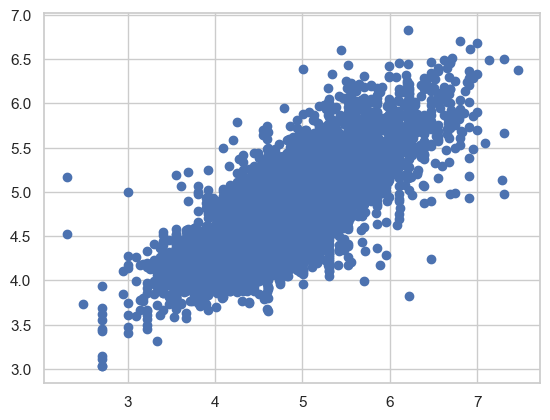

In [209]:
#plot the predicted values vs actual values
plt.scatter(ytest, y_pred)

In [224]:
#XGBoost
import xgboost as xgb


In [225]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(xtrain, ytrain)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [226]:
#score of the model
xgb_model.score(xtrain, ytrain)


0.7288266427408925

In [227]:
#predicting the values
y_pred = xgb_model.predict(xtest)
y_pred

array([4.737084 , 5.1016927, 3.9757454, ..., 4.7204494, 4.274698 ,
       5.493144 ], dtype=float32)

In [228]:
#rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ytest, y_pred))
rms

0.3935406446201291

In [229]:
#mae of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_pred)
mae

0.30094238578050364

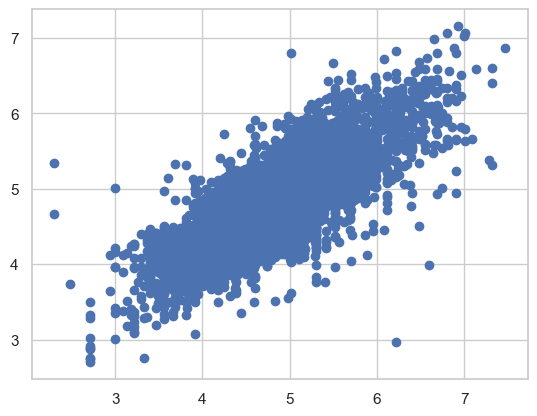

In [230]:
#plot the predicted values vs actual values
plt.scatter(ytest, y_pred)

In [231]:
#Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


In [232]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(xtrain.keys())]),
        Dense(1)
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
                  loss='mse',
                  metrics=['mae', 'mse'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(xtrain,ytrain, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................
Final Root Mean Square Error on validation set: 0.392


In [233]:
#Unsupervised ML techniques

In [234]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

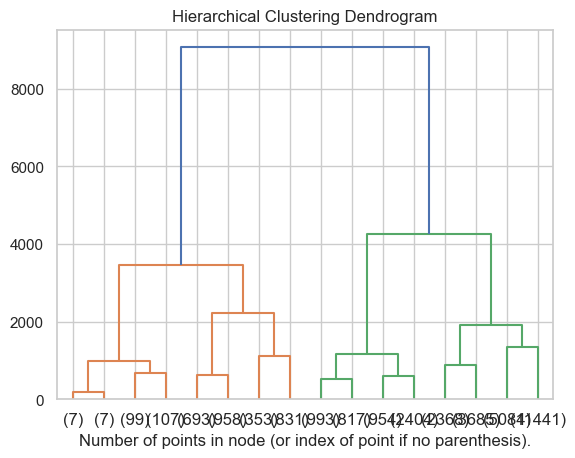

In [235]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = xtrain

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [236]:
clustering = AgglomerativeClustering(n_clusters=3).fit(xtrain,ytrain)

In [237]:
np.unique(clustering.labels_)

array([0, 1, 2], dtype=int64)

In [238]:
#SK Learn MLP Regression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split

In [239]:
regr = MLPRegressor(random_state=1, max_iter=5000).fit(xtrain,ytrain)

In [240]:
regr.score(xtrain,ytrain)

0.0727859990013594

In [241]:
#predicting the values
y_pred = regr.predict(xtest)
y_pred

array([4.65639503, 5.05740895, 3.73995108, ..., 4.05389073, 3.86536685,
       4.94501577])

In [242]:
#K-Means Clustering
from sklearn.cluster import KMeans

In [243]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(xtrain,ytrain)
kmeans.score(xtrain,ytrain)

-15230726.501212131

In [244]:
objective = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(xtrain,ytrain)
    objective += [kmeans.score(xtrain,ytrain)]

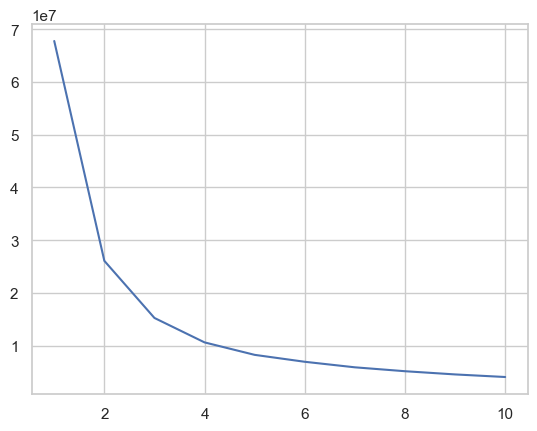

In [245]:
plt.plot(range(1,11),-np.array(objective));

In [246]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(xtrain,ytrain)
kmeans.score(xtrain,ytrain)

-10593898.632521063

In [ ]:
#R-square values of all the models

#Stats Model 1 Score - 0.258
#Stats Model 2 Score - 0.554
#sklearn linear - 0.607
#Stepwise Selection - 0.601
#K-Nearest Neighbors - 0.642
#Lasso - 0.446
#Ridge - 0.607
#Elastic net Regression - 0.499
#Elastic net CV - 0.607
#Least Angle regression - 0.497
#LarsCv - 0.607
#SP Line - 0.622
#SVM Regression -0.682
#Decision Tree - 0.976
#Decision tree max_depth-9 - 0.65750
#Random Forest - 0.609
#Bagging Regression - 0.606
#Boosting - 0.561
#Gradient Boosting - 0.65282
#HistGradientBoosting - 0.676
#Voting - 0.788
#MLP  Reg - 0.072
#XGboost - 0.728

In [ ]:
#Decision Tree Model Has the highest R-square value of 0.976